In [1]:
import numpy as np
import pandas as pd

In [12]:
CocaCola_data = pd.read_csv('KO.csv')
Pepsi_data = pd.read_csv('PEP.csv')

In [13]:
CocaCola_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-12,60.529999,60.689999,60.189999,60.540001,58.800369,15753800
1,2022-01-13,60.540001,61.040001,60.389999,60.900002,59.150032,14318000
2,2022-01-14,60.939999,61.450001,60.360001,61.389999,59.625946,19729600
3,2022-01-18,61.060001,61.189999,60.450001,60.900002,59.150032,21976700
4,2022-01-19,60.660000,61.180000,60.560001,61.000000,59.247154,18654700


In [14]:
Pepsi_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2022-01-12,173.899994,174.330002,172.949997,173.899994,169.368561,5268000
1,2022-01-13,173.710007,174.690002,173.240005,174.179993,169.641251,4310300
2,2022-01-14,174.570007,175.940002,173.399994,175.639999,171.063232,4474500
3,2022-01-18,173.619995,174.759995,173.149994,173.960007,169.427017,5789500
4,2022-01-19,173.960007,175.960007,173.570007,175.210007,170.644424,6424500


In [19]:
prices_compare = pd.DataFrame({'CocaCola':CocaCola_data.Close.values,
                              'Pepsi':Pepsi_data.Close.values})
prices_compare.head()

,CocaCola,Pepsi
0,60.540001,173.899994
1,60.900002,174.179993
2,61.389999,175.639999
3,60.900002,173.960007
4,61.000000,175.210007


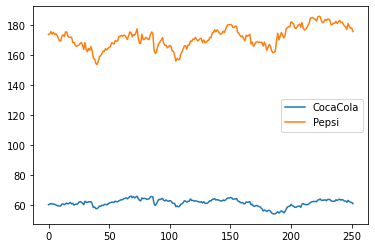

In [22]:
prices_compare.plot()

In [21]:
Daily_Returns = prices_compare/prices_compare.shift(1)-1
Daily_Returns.head()

,CocaCola,Pepsi
0,NaN,NaN
1,0.005946,0.001610
2,0.008046,0.008382
3,-0.007982,-0.009565
4,0.001642,0.007186


In [37]:
Daily_Returns=Daily_Returns.dropna()

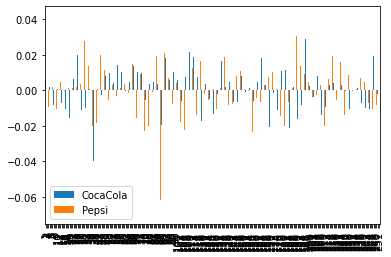

In [38]:
Daily_Returns.plot.bar()

 STANDARD DEVIATION, MEAN OF RETURNS AND VOLITALITY

In [32]:
print('Standard Deviation \n',Daily_Returns.std(),'\n Mean \n', Daily_Returns.mean())

Standard Deviation 
 CocaCola    0.012527
Pepsi       0.012395
dtype: float64 
 Mean 
 CocaCola    0.000122
Pepsi       0.000120
dtype: float64


In [50]:
number_of_ob = Daily_Returns.shape[0]
deviation = Daily_Returns-Daily_Returns.mean()
sq_deviation = deviation**2
variance = sq_deviation.sum()/(number_of_ob-1)
volatility = variance**0.5
volatility

CocaCola    0.012527
Pepsi       0.012395
dtype: float64

ANUALLIZING RETURNS


In [59]:
Annual_Returns = (Daily_Returns+1).prod()-1
Annual_Returns

CocaCola    0.011067
Pepsi       0.010811
dtype: float64

ANNUALIZING VOLITALITY

In [60]:
Annual_Volitality = Daily_Returns.std()*np.sqrt(252)
Annual_Volitality

CocaCola    0.198858
Pepsi       0.196770
dtype: float64

Risk Adjusted Returns

$$ Sharp Ratio =\frac{Excess Return}{Volitality}= \frac{Return-Riskfree Rate}{Volitality}$$

In [62]:
RiskfreeRate = 0.03
Excess_Return = Annual_Returns-RiskfreeRate
SharpRatio = Excess_Return/Annual_Volitality
SharpRatio

CocaCola   -0.095208
Pepsi      -0.097521
dtype: float64